<a href="https://colab.research.google.com/github/tikendraw/Wildfire_prediction/blob/main/Wildfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive modeling of wildfires: A new dataset and machine learning approach

Abstract
Wildfires, whether natural or caused by humans, are considered among the most dangerous and devastating disasters around the world.

To address this issue, many research efforts have been conducted in order to monitor, predict and prevent wildfires using several Artificial Intelligence techniques and strategies such as Big Data, Machine Learning, and Remote Sensing. T

he latter offers a rich source of satellite images, from which we can retrieve a huge amount of data that can be used to monitor wildfires.  The method used in this paper combines Big Data, Remote Sensing and Data Mining algorithms (Artificial Neural Network and SVM) to process data collected from satellite images over large areas and extract insights from them to predict the occurrence of wildfires and avoid such disasters. 


 This dataset is available on GitHub via this link (https://github.com/ouladsayadyounes/Wildfires). 

In [211]:
data_repo = 'https://github.com/ouladsayadyounes/WildFires'

In [212]:
# get the data
! git clone $data_repo

fatal: destination path 'WildFires' already exists and is not an empty directory.


In [213]:
#read the DATA
import pandas as pd
data = pd.read_csv('/content/WildFires/WildFires_DataSet.csv')
data.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDVI         1713 non-null   float64
 1   LST          1713 non-null   float64
 2   BURNED_AREA  1713 non-null   float64
 3   CLASS        1713 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


In [215]:
data.describe()

,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


In [216]:
# check for nulls
data.isnull().sum()

NDVI           0
LST            0
BURNED_AREA    0
CLASS          0
dtype: int64

In [217]:
# Removing the Duplicates
print('before Dropping',data.shape)

data.drop_duplicates(keep='first',inplace = True)
print('after Dropping',data.shape)


before Dropping (1713, 4)
after Dropping (1438, 4)


# EDA

### checking for Feature Correlation

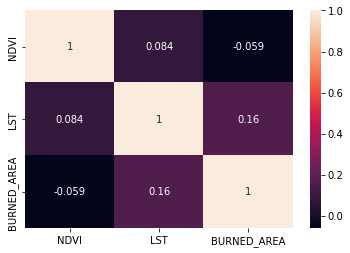

In [218]:
import seaborn as sns
import numpy as np
sns.heatmap(data.corr(), annot = True)

There is no Strong Correlation:
Feature are independent

## Checking Distribution

### Univariate Analysis

In [219]:
cols = data.columns
print(cols)

Index(['NDVI', 'LST', 'BURNED_AREA', 'CLASS'], dtype='object')


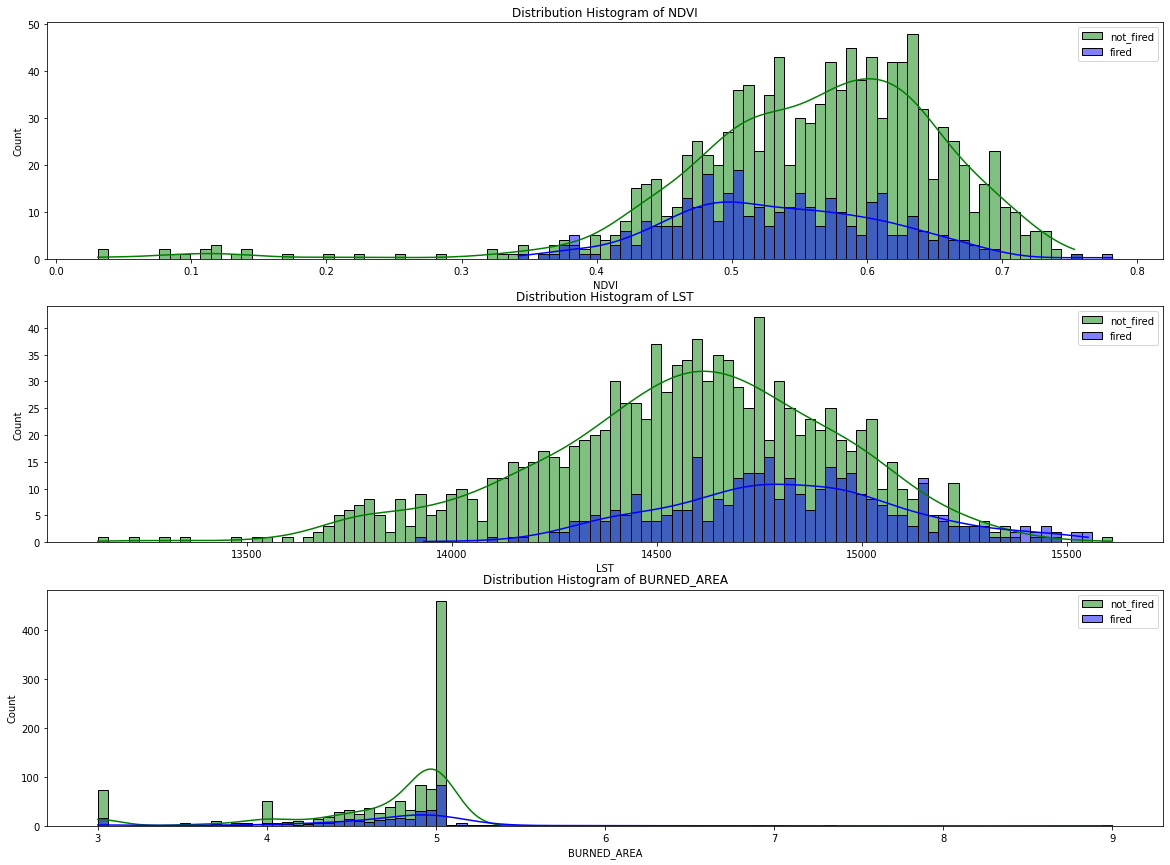

In [220]:
import matplotlib.pyplot as plt

#creating temp 
_fired = data[(data.CLASS=='fire')]
_not_fired = data[~(data.CLASS=='fire')]

plt.figure(figsize = (20,20))

for i,col in enumerate(cols):
    if i < 3:
        plt.subplot(4,1,i+1)
        # d_plot(cols[i])
        # plt.title(cols[i])
        data1 = _fired[col]
        data2 = _not_fired[col]
        # plt.figure(figsize=(15,5))
        bins = np.linspace(data[col].min(), data[col].max(), 100)
        sns.histplot(data2, bins=bins, alpha=0.5, color='green', kde=True,label='not_fired')

        sns.histplot(data1, bins=bins, alpha=0.5, color = 'blue', kde=True,label='fired')
        plt.gca().set(title=f'Distribution Histogram of {col}', ylabel='Count')
        plt.legend()

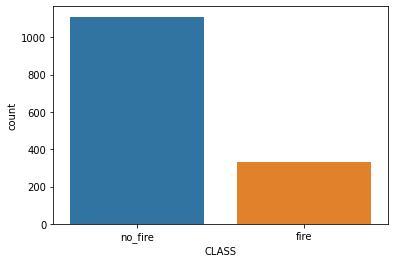

In [221]:
sns.countplot(data = data , x = 'CLASS')

**High Class Immbalance**

# Outlier Removal

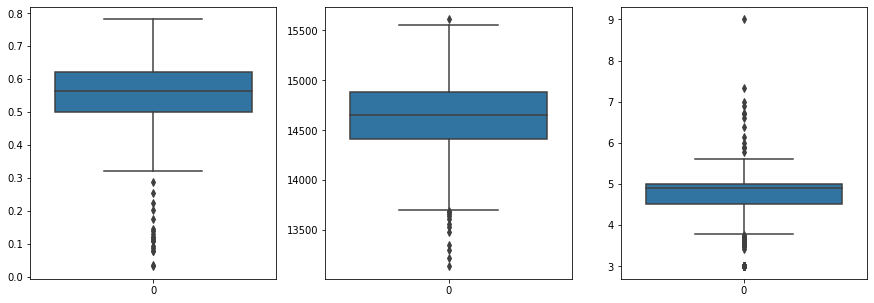

In [222]:
# OUtliers check
num_col = data.select_dtypes('float')

plt.figure(figsize=(15,5))
i = 1
for col in num_col:
    plt.subplot(1,3,i)
    sns.boxplot(data = data[col])
    i += 1
plt.show()

In [223]:
from sklearn.covariance import EllipticEnvelope

# we will use a copy of data with dropped labels
data_with_no_labels = data.drop('CLASS', axis = 1)
elliptical = EllipticEnvelope().fit(data_with_no_labels)
outliers = elliptical.predict(data_with_no_labels)

outliers

array([ 1,  1,  1, ...,  1, -1,  1])

In [224]:
from collections import Counter
bincount = Counter(outliers)
print(bincount)
print(f'There are {bincount[-1]} Outliers in the dataset')

Counter({1: 1294, -1: 144})
There are 144 Outliers in the dataset


In [225]:
data['outlier'] = outliers
data.head()

,NDVI,LST,BURNED_AREA,CLASS,outlier
0,0.506782,14584.272727,4.692308,no_fire,1
1,0.522150,14655.833333,5.000000,no_fire,1
2,0.682284,14780.000000,5.000000,fire,1
3,0.120046,13298.500000,3.500000,no_fire,-1
4,0.568734,14743.000000,5.000000,no_fire,1


In [226]:
new_data =  data[data.outlier == 1]

#dropping outlier column
new_data = new_data.drop('outlier', axis = 1)
new_data.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
4,0.568734,14743.000000,5.000000,no_fire
5,0.454228,14929.571429,4.904762,fire


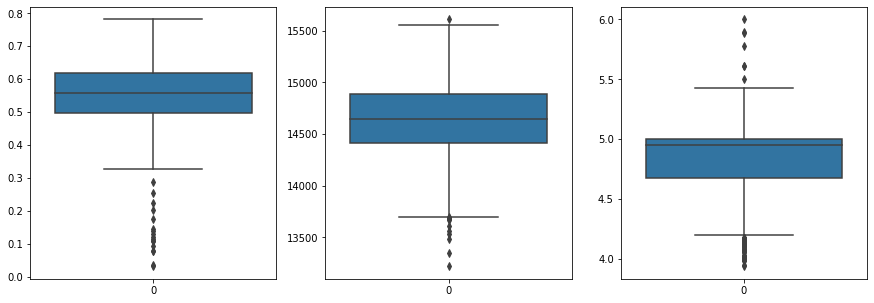

In [227]:
# OUtliers check
num_col = new_data.select_dtypes('float')

plt.figure(figsize=(15,5))
i = 1
for col in num_col:
    plt.subplot(1,3,i)
    sns.boxplot(data = new_data[col])
    i += 1
plt.show()

* Outlier Removal changes a the Dataset a Little as there are not many outliers

## Feature Engineering

We will create features with combination of other features and see it Helps to improve our models performance

In [228]:
from sklearn.preprocessing import PolynomialFeatures

In [229]:
x = new_data.select_dtypes('number')
x.head()

,NDVI,LST,BURNED_AREA
0,0.506782,14584.272727,4.692308
1,0.522150,14655.833333,5.000000
2,0.682284,14780.000000,5.000000
4,0.568734,14743.000000,5.000000
5,0.454228,14929.571429,4.904762


In [230]:
polynomial_features = PolynomialFeatures(degree=3)
data_poly = polynomial_features.fit_transform(x)

In [231]:
data_poly.shape

(1294, 20)

In [232]:
data_poly

array([[1.00000000e+00, 5.06782000e-01, 1.45842727e+04, ...,
        9.98058655e+08, 3.21112935e+05, 1.03314085e+02],
       [1.00000000e+00, 5.22150000e-01, 1.46558333e+04, ...,
        1.07396725e+09, 3.66395833e+05, 1.25000000e+02],
       [1.00000000e+00, 6.82284000e-01, 1.47800000e+04, ...,
        1.09224200e+09, 3.69500000e+05, 1.25000000e+02],
       ...,
       [1.00000000e+00, 6.21721000e-01, 1.44060000e+04, ...,
        1.03766418e+09, 3.60150000e+05, 1.25000000e+02],
       [1.00000000e+00, 7.09715000e-01, 1.43304000e+04, ...,
        9.96378094e+08, 3.37344320e+05, 1.14214866e+02],
       [1.00000000e+00, 5.49497000e-01, 1.42697778e+04, ...,
        1.01813279e+09, 3.56744444e+05, 1.25000000e+02]])

#Preprocessing

* Scale/Normalize the data
* Encode the Labels

In [233]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [234]:
le = LabelEncoder()
enc_label = le.fit_transform(new_data.CLASS)
enc_label

array([1, 1, 0, ..., 1, 1, 0])

Lables Encoded as :
* No_fire = 1
* Fire    = 0

In [235]:
new_data['CLASS'] = enc_label

In [236]:
new_data.head()

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,1
1,0.522150,14655.833333,5.000000,1
2,0.682284,14780.000000,5.000000,0
4,0.568734,14743.000000,5.000000,1
5,0.454228,14929.571429,4.904762,0


## Splititng the dATA

In [237]:
# features and Labels
X = new_data.drop('CLASS', axis = 1)
y = new_data.CLASS # non Scaled

In [238]:
# Spliting the DATA
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = .2, random_state = 2, stratify = y)

In [239]:
# Scaling the data
scaler = MinMaxScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [240]:
print('xtest', xtest_scaled.shape,
      'ytest', ytest.shape,
      'xtrain', xtrain_scaled.shape,
      'ytrain',ytrain.shape)

xtest (259, 3) ytest (259,) xtrain (1035, 3) ytrain (1035,)


In [241]:
# spliting the Poly data
xtrain_poly, xtest_poly, ytrain_poly, ytest_poly = train_test_split(data_poly, y, test_size = .2, random_state = 2, stratify = y)

In [242]:
# scaling poly data
scaler = MinMaxScaler()
xtrain_poly_scaled = scaler.fit_transform(xtrain_poly)
xtest_poly_scaled = scaler.transform(xtest_poly)

In [243]:
print('xtest', xtest_poly_scaled.shape,
      'ytest', ytest_poly.shape,
      'xtrain', xtrain_poly_scaled.shape,
      'ytrain',ytrain_poly.shape)

xtest (259, 20) ytest (259,) xtrain (1035, 20) ytrain (1035,)


## Helper functions

In [244]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    """
    Calculates model accuracy, precision, recall and f1 score of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array

    Returns a dictionary of accuracy, precision, recall, f1-score.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results


In [245]:
# function to plot roc curve
# !pip install scikit-plot
import scikitplot as skplt
def plot_roc(y_true, y_probas, figsize = (15,10)):
    skplt.metrics.plot_roc(y_true, y_probas,figsize = figsize)
    plt.show()

# Models

In [246]:
from sklearn.pipeline import Pipeline

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [248]:
clfs = {'logistic regression': LogisticRegression(),
        'SVM': SVC(probability=True),
        'Knn': KNeighborsClassifier(n_neighbors=5),
        'D Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 20),
        'Xtra Random Forest': ExtraTreesClassifier(n_estimators = 20),
        'naive bayes': BernoulliNB()}

* Now Let's test all models

In [249]:
#function to train all model at once
def models(xtrain, ytrain, xtest, ytest):
    sscores = []
    for name, model in clfs.items():
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        result = {'model' : name}
        result.update(calculate_results(ytest, ypred))
        sscores.append(result)
    return sscores

In [250]:
scores = models(xtrain_scaled, ytrain, xtest_scaled,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Voting Classifier

In [251]:
def votingclf(xtrain, ytrain, xtest, ytest):
    vt_clf = VotingClassifier(clfs.items(), voting = 'soft', n_jobs = -1)
    vt_clf.fit(xtrain, ytrain )
    ypred = vt_clf.predict(xtest)

    # calculate  result
    vc_result = calculate_results(ytest, ypred)
    vc_result['model'] = 'voting_classifier'
    return vc_result

In [252]:
vc_result = votingclf(xtrain_scaled, ytrain, xtest_scaled,ytest)

# add score
scores.append(vc_result)

## fitting on polynomial data

In [253]:
poly_model_result = models(xtrain_poly_scaled, ytrain_poly, xtest_poly_scaled, ytest_poly)
poly_votingclf_result = votingclf(xtrain_poly_scaled, ytrain_poly, xtest_poly_scaled, ytest_poly)


In [254]:
all_results = [poly_model_result, poly_votingclf_result]

In [255]:
#appending results
poly_model_result.append(poly_votingclf_result)
scores2 = poly_model_result



## Xgboost classifier

In [256]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [257]:
from xgboost import XGBClassifier

In [258]:
def xgb(xtrain,ytrain, xtest, ytest):
    xgb = XGBClassifier()
    xgb.fit(xtrain, ytrain)
    ypred = xgb.predict(xtest)

    # calculate  result
    xgb_result = calculate_results(ytest, ypred)
    xgb_result['model'] = 'xgb'

    return xgb_result


In [259]:
xgb_result = xgb(xtrain_scaled, ytrain, xtest_scaled, ytest)
# add score to dataframe
scores.append(xgb_result)


In [260]:
xgb_result2 = xgb(xtrain_poly_scaled,ytrain_poly, xtest_poly_scaled, ytest_poly)
# add score to dataframe
scores2.append(xgb_result2)

In [261]:
scoresheet2 = pd.DataFrame(scores2)
scoresheet2

,model,accuracy,precision,recall,f1
0,logistic regression,76.061776,0.693968,0.760618,0.704007
1,SVM,77.992278,0.755590,0.779923,0.693951
2,Knn,76.061776,0.737891,0.760618,0.746049
3,D Tree,67.567568,0.702345,0.675676,0.687288
4,Random Forest,76.833977,0.762743,0.768340,0.765344
5,Xtra Random Forest,74.903475,0.735301,0.749035,0.741228
6,naive bayes,76.833977,0.600919,0.768340,0.674394
7,voting_classifier,75.675676,0.706445,0.756757,0.717628
8,xgb,77.606178,0.744442,0.776062,0.750517


In [262]:
scoresheet = pd.DataFrame(scores)
scoresheet

,model,accuracy,precision,recall,f1
0,logistic regression,77.220077,0.702657,0.772201,0.695657
1,SVM,78.764479,0.790223,0.787645,0.710689
2,Knn,74.517375,0.723289,0.745174,0.731974
3,D Tree,72.586873,0.720809,0.725869,0.723245
4,Random Forest,75.289575,0.737948,0.752896,0.744239
5,Xtra Random Forest,73.745174,0.717950,0.737452,0.726110
6,naive bayes,77.606178,0.602272,0.776062,0.678211
7,voting_classifier,77.992278,0.736466,0.779923,0.725738
8,xgb,78.764479,0.762510,0.787645,0.767132


In [263]:
scoresheet2 > scoresheet

,model,accuracy,precision,recall,f1
0,False,False,False,False,True
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,True,True,True,True
5,False,True,True,True,True
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False


# Fixing Class Immbalance

we will use oversampling technique to Overcome class imbalance using `imblearn`'s smote

In [264]:
X = new_data.drop('CLASS', axis = 1)
y = new_data.CLASS

In [265]:
print('CLass Count',Counter(y))

CLass Count Counter({1: 1002, 0: 292})


In [266]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X,y)

In [267]:
print('CLass Count after SMOTING(PUN)',Counter(y_balanced))

CLass Count after SMOTING(PUN) Counter({1: 1002, 0: 1002})


In [268]:
#splitiing data
xtrain_bala, xtest_bala, ytrain_bala, ytest_bala = train_test_split(X_balanced, y_balanced, test_size=.2, random_state= 2, stratify = y_balanced)
print('xtrain_balanced',xtrain_bala.shape,ytrain_bala.shape, 
      'xtest_balanced',xtest_bala.shape,  ytest_bala.shape)

xtrain_balanced (1603, 3) (1603,) xtest_balanced (401, 3) (401,)


In [269]:
from numpy.ma.core import size
# lets see its representation on 3D
import plotly.express as px

# Scaling to visualize it better
_scale = MinMaxScaler()
xtrain_bala_scaled = _scale.fit_transform(xtrain_bala)
xtest_bala_scaled = _scale.transform(xtest_bala)

# px.scatter_3d(X_balanced, x = X_balanced[:,0], y = X_balanced[:,1], z = X_balanced[:,2], color = y_balanced, size = 0)


# Mode Score on Balanced DATA

In [270]:
# scaling data
bala_scaler = MinMaxScaler()
bala_scaler.fit(xtrain_bala)
xtrain_bala_scaled = bala_scaler.transform(xtrain_bala)
xtest_bala_scaled = bala_scaler.transform(xtest_bala)

In [271]:
balanced_model_result = models(xtrain_bala_scaled, ytrain_bala, xtest_bala_scaled, ytest_bala)
balanced_votingclf_result = votingclf(xtrain_bala_scaled, ytrain_bala, xtest_bala_scaled, ytest_bala)
xgb_result = xgb(xtrain_bala_scaled, ytrain_bala, xtest_bala_scaled, ytest_bala)


In [272]:
#appending results
balanced_model_result.append(balanced_votingclf_result)
balanced_model_result.append(xgb_result)

scores3 = balanced_model_result

In [273]:
scoresheet3 = pd.DataFrame(scores3)
scoresheet3

,model,accuracy,precision,recall,f1
0,logistic regression,71.820449,0.718614,0.718204,0.718047
1,SVM,75.311721,0.755353,0.753117,0.752532
2,Knn,73.566085,0.736216,0.735661,0.735480
3,D Tree,75.062344,0.750711,0.750623,0.750592
4,Random Forest,78.553616,0.790352,0.785536,0.784596
5,Xtra Random Forest,81.296758,0.821610,0.812968,0.811653
6,naive bayes,50.374065,0.750630,0.503741,0.340239
7,voting_classifier,81.546135,0.817447,0.815461,0.815149
8,xgb,78.802993,0.791811,0.788030,0.787300


In [274]:
scoresheet2

,model,accuracy,precision,recall,f1
0,logistic regression,76.061776,0.693968,0.760618,0.704007
1,SVM,77.992278,0.755590,0.779923,0.693951
2,Knn,76.061776,0.737891,0.760618,0.746049
3,D Tree,67.567568,0.702345,0.675676,0.687288
4,Random Forest,76.833977,0.762743,0.768340,0.765344
5,Xtra Random Forest,74.903475,0.735301,0.749035,0.741228
6,naive bayes,76.833977,0.600919,0.768340,0.674394
7,voting_classifier,75.675676,0.706445,0.756757,0.717628
8,xgb,77.606178,0.744442,0.776062,0.750517


In [275]:
scoresheet

,model,accuracy,precision,recall,f1
0,logistic regression,77.220077,0.702657,0.772201,0.695657
1,SVM,78.764479,0.790223,0.787645,0.710689
2,Knn,74.517375,0.723289,0.745174,0.731974
3,D Tree,72.586873,0.720809,0.725869,0.723245
4,Random Forest,75.289575,0.737948,0.752896,0.744239
5,Xtra Random Forest,73.745174,0.717950,0.737452,0.726110
6,naive bayes,77.606178,0.602272,0.776062,0.678211
7,voting_classifier,77.992278,0.736466,0.779923,0.725738
8,xgb,78.764479,0.762510,0.787645,0.767132


# Conclusion

# Fine Tuning `XGBClassifier`

Xgb is best performing model with Default parameter .

Now lets fine tune xgb and train on whole dataset

In [276]:
boost_params = {
    'learning_rate': [0.01, 0.005, 0.1 ,1]
,'n_estimators': [100, 200, 250, 150]
,'max_depth': [ 3, 5, 7, 9, 11]
,'subsample': [0.7, 0.8, 0.9, 1 ]
,'gamma': [0.1, 0.5 , 1.0, 1.5, 2.0]
# , 'booster' :['gbtree', 'gblinear', 'dart']
}

In [277]:
xgb = XGBClassifier(booster = 'gbtree', n_jobs=-1)

In [278]:
# since it is a cross validation we do not need to split the whole data into train

In [279]:
from sklearn.model_selection import RandomizedSearchCV

def random_search_cv(estimator, params, n_iters, return_train_score = True, **kwargs):
    'returns randomized search model, save it in a variable'
    random_cv = RandomizedSearchCV( estimator = estimator, 
                                          param_distributions = params, 
                                          n_iter= n_iters, 
                                          return_train_score = return_train_score,verbose = 1, **kwargs)
    random_cv.fit(X_balanced, y_balanced)
    print( f'''best score: {random_cv.best_score_}
    best estimator: {random_cv.best_estimator_}
    best params: {random_cv.best_params_}
    best index: {random_cv.best_index_}''')
    return random_cv

In [280]:
rscv = random_search_cv(xgb, boost_params, n_iters=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best score: 0.8078977556109725
    best estimator: XGBClassifier(gamma=0.5, max_depth=11, n_jobs=-1, subsample=0.9)
    best params: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.5}
    best index: 27


In [281]:
# getting the best params
xgb_param = rscv.best_params_
xgb_param

{'subsample': 0.9,
 'n_estimators': 100,
 'max_depth': 11,
 'learning_rate': 0.1,
 'gamma': 0.5}

In [282]:
xgb_tuned = XGBClassifier( n_estimators=xgb_param['n_estimators'],
                                    subsample = xgb_param['subsample'],
                                    gamma = xgb_param['gamma'],
                                    learning_rate = xgb_param['learning_rate'],
                                    max_depth= xgb_param['max_depth'])

In [283]:
# fitting on splitted data to see performance
xgb_tuned.fit(xtrain_bala_scaled, ytrain_bala)

XGBClassifier(gamma=0.5, max_depth=11, subsample=0.9)

In [284]:
ypred = xgb_tuned.predict(xtest_bala_scaled)

calculate_results(y_true=ytest_bala, y_pred = ypred)

{'accuracy': 81.79551122194513,
 'precision': 0.8207941973293787,
 'recall': 0.8179551122194514,
 'f1': 0.8175238364957551}

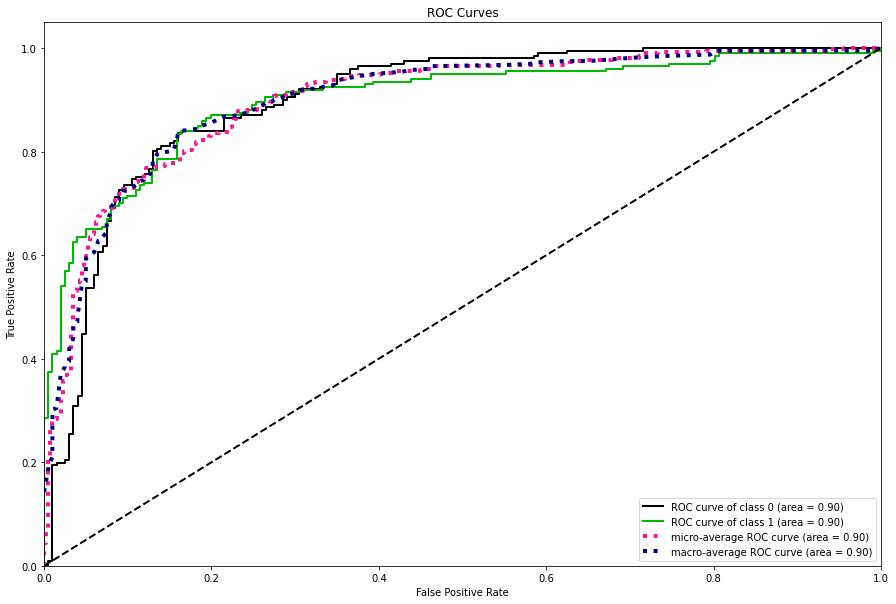

In [285]:
# ploting roc curve for xgbclassifier
# it requires probability as input rather than hard value
ypred_proba = xgb_tuned.predict_proba(xtest_bala_scaled)
plot_roc(ytest_bala, ypred_proba)

 **Best Score so far**

In [286]:
# fittting on Whole data
xgb_tuned.fit(X_balanced, y_balanced)

XGBClassifier(gamma=0.5, max_depth=11, subsample=0.9)

In [287]:
import joblib
# saving the Model
joblib.dump(xgb_tuned,'XGBClassifier.joblib')

['XGBClassifier.joblib']

# Fine Tuning Random FOrest

In [288]:
rand_params ={
 'max_depth': [ 3, 5, 7, 9, 11],
 'max_leaf_nodes': [2,3,4,5],
 'min_samples_leaf': [2,3,4,5],
 'min_samples_split': [3,4,5],
 'n_estimators': [100,150, 200,250]
}

In [289]:
rand = RandomForestClassifier(bootstrap=True, oob_score=True, n_jobs= -1, criterion='gini')

In [290]:
# using random function to perform random search cv
rscv2 = random_search_cv(rand, rand_params, n_iters=50)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best score: 0.7430311720698254
    best estimator: RandomForestClassifier(max_depth=11, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=150, n_jobs=-1,
                       oob_score=True)
    best params: {'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 5, 'max_depth': 11}
    best index: 49


In [291]:
param = rscv2.best_params_

In [292]:
rand_tuned = RandomForestClassifier(n_estimators=param['n_estimators'],
                                    min_samples_split = param['min_samples_split'],
                                    min_samples_leaf = param['min_samples_leaf'],
                                    max_leaf_nodes = param['max_leaf_nodes'],
                                    max_depth= param['max_depth'],
                                    bootstrap= True, oob_score=True)

In [293]:
# fitting on splitted data to see performance
rand_tuned.fit(xtrain_bala_scaled, ytrain_bala)

RandomForestClassifier(max_depth=11, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=150, oob_score=True)

In [294]:
ypred2 = rand_tuned.predict(xtest_bala_scaled)

calculate_results(y_true=ytest_bala, y_pred = ypred2)

{'accuracy': 77.0573566084788,
 'precision': 0.7727212151767202,
 'recall': 0.770573566084788,
 'f1': 0.7700845119810794}

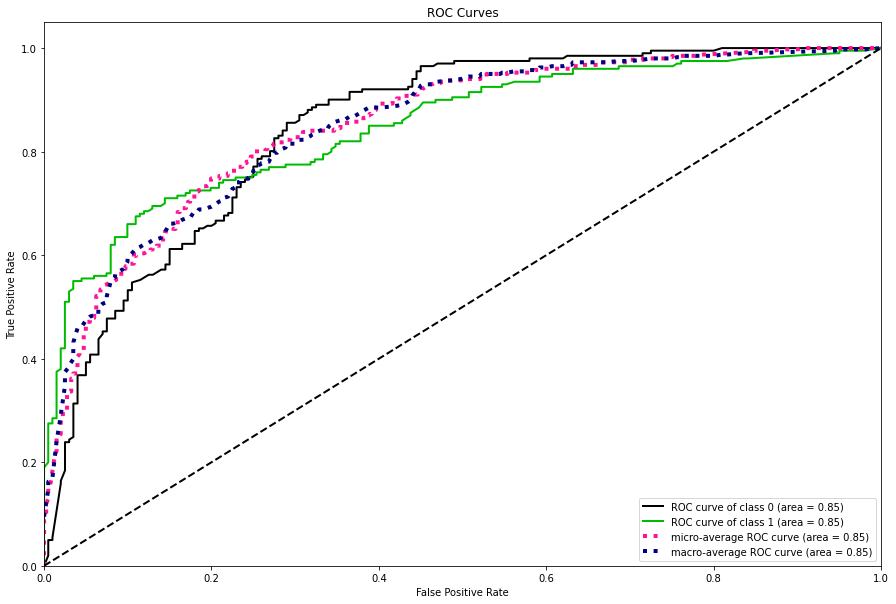

In [295]:
# ploting roc curve for random forest classifier
# it requires probability as input rather than hard value
ypred2_proba = rand_tuned.predict_proba(xtest_bala_scaled)
plot_roc(ytest_bala, ypred2_proba)

In [296]:
#FInally fitting whole dataset
rand_tuned.fit(X_balanced, y_balanced)

RandomForestClassifier(max_depth=11, max_leaf_nodes=5, min_samples_leaf=2,
                       min_samples_split=4, n_estimators=150, oob_score=True)

In [297]:
# Saving model
joblib.dump(rand_tuned, 'RandomForestClassifier.joblib')

['RandomForestClassifier.joblib']

## Just to see a Cross validation

In [298]:
from sklearn.model_selection import cross_val_score

In [299]:
aa = cross_val_score(xgb_tuned, X_balanced, y_balanced, n_jobs=-1,
                     verbose = 1,
                     cv = 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


In [300]:
np.mean(aa)

0.8078977556109725

In [301]:
aaa = cross_val_score(rand_tuned, X_balanced, y_balanced, n_jobs=-1,
                     verbose = 1,
                     cv = 5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished


In [302]:
np.mean(aaa)

0.7415336658354115